In [2]:
from ncNet import ncNet

### init the ncNet by specify the trained model path.

In [3]:
ncNet = ncNet(
    trained_model= './save_models/model_best.pt'
)

/Users/yuyu/anaconda3/lib/python3.8/site-packages/torchtext/data/field.py:150: UserWarning: Field class will be retired soon and moved to torchtext.legacy. Please see the most recent release notes for further information.
  warnings.warn('{} class will be retired soon and moved to torchtext.legacy. Please see the most recent release notes for further information.'.format(self.__class__.__name__), UserWarning)
/Users/yuyu/anaconda3/lib/python3.8/site-packages/torchtext/data/example.py:68: UserWarning: Example class will be retired soon and moved to torchtext.legacy. Please see the most recent release notes for further information.
  warnings.warn('Example class will be retired soon and moved to torchtext.legacy. Please see the most recent release notes for further information.', UserWarning)
/Users/yuyu/anaconda3/lib/python3.8/site-packages/torchtext/data/example.py:78: UserWarning: Example class will be retired soon and moved to torchtext.legacy. Please see the most recent release note

### specify the dataset

three types of dataset: sqlite3, csv, json

In [4]:
# example of read a table from sqlite3
ncNet.specify_dataset(
    data_type = 'sqlite3', # csv, json
    db_url = './dataset/database/covid19/covid19.sqlite',
    table_name= 'us_states'
)

In [5]:
ncNet.show_dataset()

date      states      cases  number
0  2020-01-21  Washington  confirmed       1
1  2020-01-21  Washington     deaths       0
2  2020-01-22  Washington  confirmed       1
3  2020-01-22  Washington     deaths       0
4  2020-01-23  Washington  confirmed       1

The Predicted VIS:


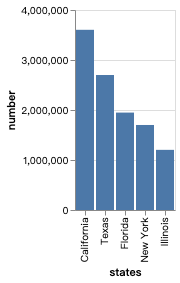

In [7]:
# example of creating VIS by ncNet, without chart template
ncNet.nl2vis('Create a bar chart showing the top 5 states with the most conﬁrmed cases until 2021-03-08')

The Predicted VIS:


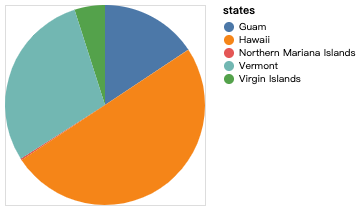

In [9]:
# example of creating VIS by ncNet, with full chart template
ncNet.nl2vis(
    nl_question= 'show the top 5 states with the most conﬁrmed cases until 2021-03-08',
    chart_template={
        'chart': 'pie',
        'sorting_options':{
            'axis': 'y',
            'type': 'asc'
        }
    }
)

The Predicted VIS:


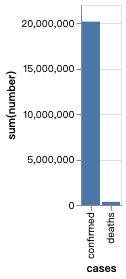

In [10]:
# example of creating VIS by ncNet, with partial chart template
ncNet.nl2vis(
    nl_question= 'show me total number by cases type',
    chart_template={
        'chart': 'bar'
    }
)

The Predicted VIS:


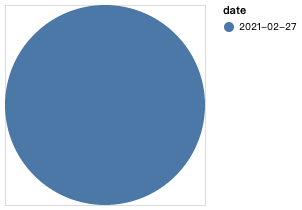

In [12]:
ncNet.nl2vis(
    nl_question= 'I want to know the proportion of total number by each case',
    chart_template=None
)

In [11]:
# example dataset from Vega-Lite and NL4DV (NEW DATASET)
ncNet.specify_dataset(
    data_type = 'json',
    table_name = 'cars',
    data_url = 'https://vega.github.io/vega-lite/examples/data/cars.json' # from a remote json url
)

In [12]:
ncNet.show_dataset()

Name  Miles_per_Gallon  Cylinders  Displacement  \
0  chevrolet chevelle malibu              18.0          8         307.0   
1          buick skylark 320              15.0          8         350.0   
2         plymouth satellite              18.0          8         318.0   
3              amc rebel sst              16.0          8         304.0   
4                ford torino              17.0          8         302.0   

   Horsepower  Weight_in_lbs  Acceleration        Year Origin  
0       130.0           3504          12.0  1970-01-01    USA  
1       165.0           3693          11.5  1970-01-01    USA  
2       150.0           3436          11.0  1970-01-01    USA  
3       150.0           3433          12.0  1970-01-01    USA  
4       140.0           3449          10.5  1970-01-01    USA


input_src: <nl> count name in a bar chart </nl> <template> visualize [c] select [x], [agg(y)] from [d] where [w] group by [xy] bin [x] by [i] order by [xy] [t] </template> <col> name year </col> <value>  </value>
token_types: nl nl nl nl nl nl nl nl template template template template template template template template template template template template template template template template template template template template template template col col col col value value value
[NL Question]: count name in a bar chart
[Chart Template]: None
[Predicted VIS Query]: visualize bar select name , count(name) from cars group by name
The Predicted VIS:


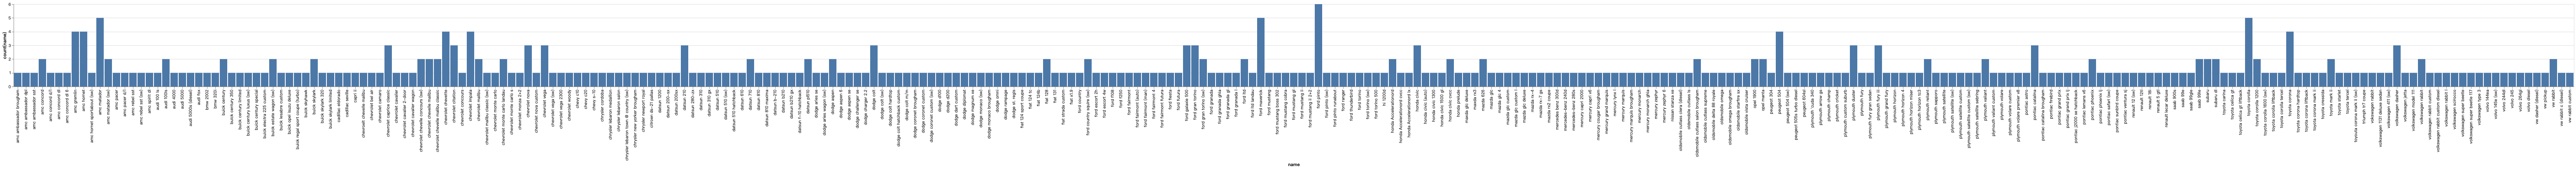

In [13]:
ncNet.nl2vis("count name in a bar chart")


input_src: <nl> show origin as a bar chart </nl> <template> visualize [c] select [x], [agg(y)] from [d] where [w] group by [xy] bin [x] by [i] order by [xy] [t] </template> <col> origin year </col> <value>  </value>
token_types: nl nl nl nl nl nl nl nl template template template template template template template template template template template template template template template template template template template template template template col col col col value value value
[NL Question]: show origin as a bar chart
[Chart Template]: None
[Predicted VIS Query]: visualize bar select origin , count(origin) from cars group by origin order by origin
The Predicted VIS:


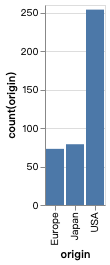

In [14]:
ncNet.nl2vis('show origin as a bar chart') # example NL question from NL4DV


input_src: <nl> show a line chart of horsepower over the years </nl> <template> visualize [c] select [x], [agg(y)] from [d] where [w] group by [xy] bin [x] by [i] order by [xy] [t] </template> <col> horsepower year </col> <value>  </value>
token_types: nl nl nl nl nl nl nl nl nl nl nl template template template template template template template template template template template template template template template template template template template template template template col col col col value value value
[NL Question]: show a line chart of horsepower over the years
[Chart Template]: None
[Predicted VIS Query]: visualize line select horsepower , count(horsepower) from cars group by horsepower
The Predicted VIS:


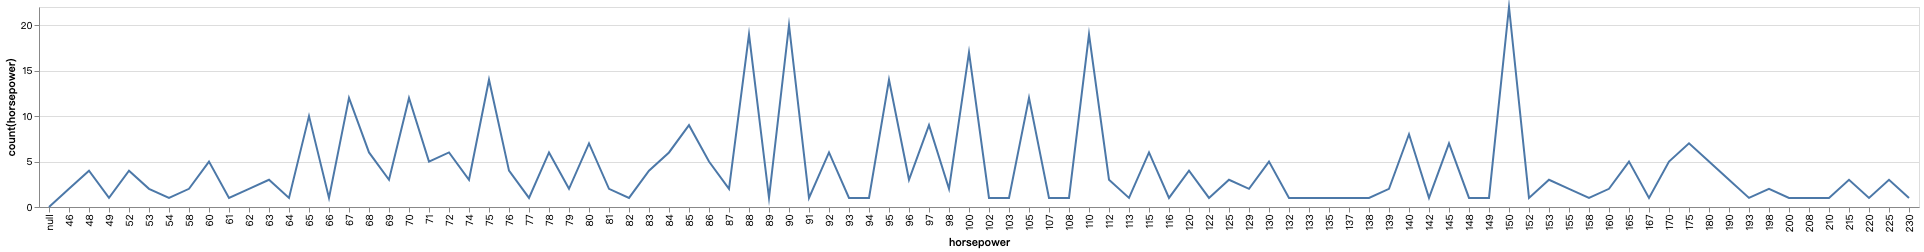

In [15]:
ncNet.nl2vis("show a line chart of horsepower over the years") # wrong answer!


input_src: <nl> show a grouping bar chart, group by year and count accelar </nl> <template> visualize [c] select [x], [agg(y)] from [d] where [w] group by [xy] bin [x] by [i] order by [xy] [t] </template> <col> year </col> <value>  </value>
token_types: nl nl nl nl nl nl nl nl nl nl nl nl nl template template template template template template template template template template template template template template template template template template template template template template col col col value value value
[NL Question]: show a grouping bar chart, group by year and count accelar
[Chart Template]: None
[Predicted VIS Query]: visualize bar select year , count(year) from cars group by year
The Predicted VIS:


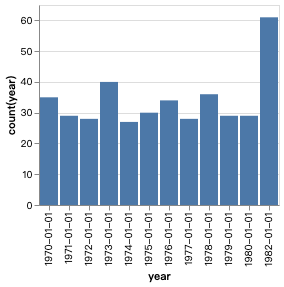

In [16]:
ncNet.nl2vis("show a grouping bar chart, group by year and count accelar")

In [17]:
ncNet.specify_dataset(
    data_type = 'json',
    table_name = 'movies',
    data_url= 'https://vega.github.io/vega-lite/examples/data/movies.json'
)

error.
error.
error.
error.
error.
error.
error.
error.
error.
error.
error.
error.


/Users/yuyu/anaconda3/lib/python3.8/site-packages/pandas/core/generic.py:2653: UserWarning: The spaces in these column names will not be changed. In pandas versions < 0.14, spaces were converted to underscores.
  sql.to_sql(


In [18]:
ncNet.show_dataset()

Title   US Gross  Worldwide Gross  US DVD Sales  \
0              The Land Girls   146083.0         146083.0           NaN   
1      First Love, Last Rites    10876.0          10876.0           NaN   
2  I Married a Strange Person   203134.0         203134.0           NaN   
3        Let's Talk About Sex   373615.0         373615.0           NaN   
4                        Slam  1009819.0        1087521.0           NaN   

   Production Budget Release Date MPAA Rating  Running Time min Distributor  \
0          8000000.0  Jun 12 1998           R               NaN    Gramercy   
1           300000.0  Aug 07 1998           R               NaN      Strand   
2           250000.0  Aug 28 1998        None               NaN   Lionsgate   
3           300000.0  Sep 11 1998        None               NaN   Fine Line   
4          1000000.0  Oct 09 1998           R               NaN     Trimark   

                Source Major Genre         Creative Type Director  \
0                 None        None                  None     None   
1                 None       Drama                  None     None   
2                 None      Comedy                  None     None   
3                 None      Comedy                  None     None   
4  Original Screenplay       Drama  Contemporary Fiction     None   

   Rotten Tomatoes Rating  IMDB Rating  IMDB Votes  
0                     NaN          6.1      1071.0  
1                     NaN          6.9       207.0  
2                     NaN          6.8       865.0  
3                    13.0          NaN         NaN  
4                    62.0          3.4       165.0


input_src: <nl> a line chart about average ratings by title </nl> <template> visualize [c] select [x], [agg(y)] from [d] where [w] group by [xy] bin [x] by [i] order by [xy] [t] </template> <col> title </col> <value>  </value>
token_types: nl nl nl nl nl nl nl nl nl nl template template template template template template template template template template template template template template template template template template template template template template col col col value value value
[NL Question]: a line chart about average ratings by title
[Chart Template]: None
[Predicted VIS Query]: visualize line select title , avg(title) from movies group by title
The Predicted VIS:


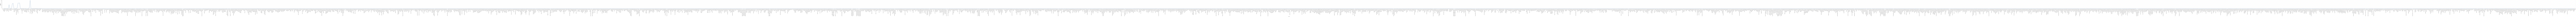

In [22]:
ncNet.nl2vis("a line chart about average ratings by title")


input_src: <nl> show me distribution of distributor as a bar chart </nl> <template> visualize [c] select [x], [agg(y)] from [d] where [w] group by [xy] bin [x] by [i] order by [xy] [t] </template> <col> distributor </col> <value>  </value>
token_types: nl nl nl nl nl nl nl nl nl nl nl template template template template template template template template template template template template template template template template template template template template template template col col col value value value
[NL Question]: show me distribution of distributor as a bar chart
[Chart Template]: None
[Predicted VIS Query]: visualize bar select distributor , count(*) from movies group by distributor
The Predicted VIS:


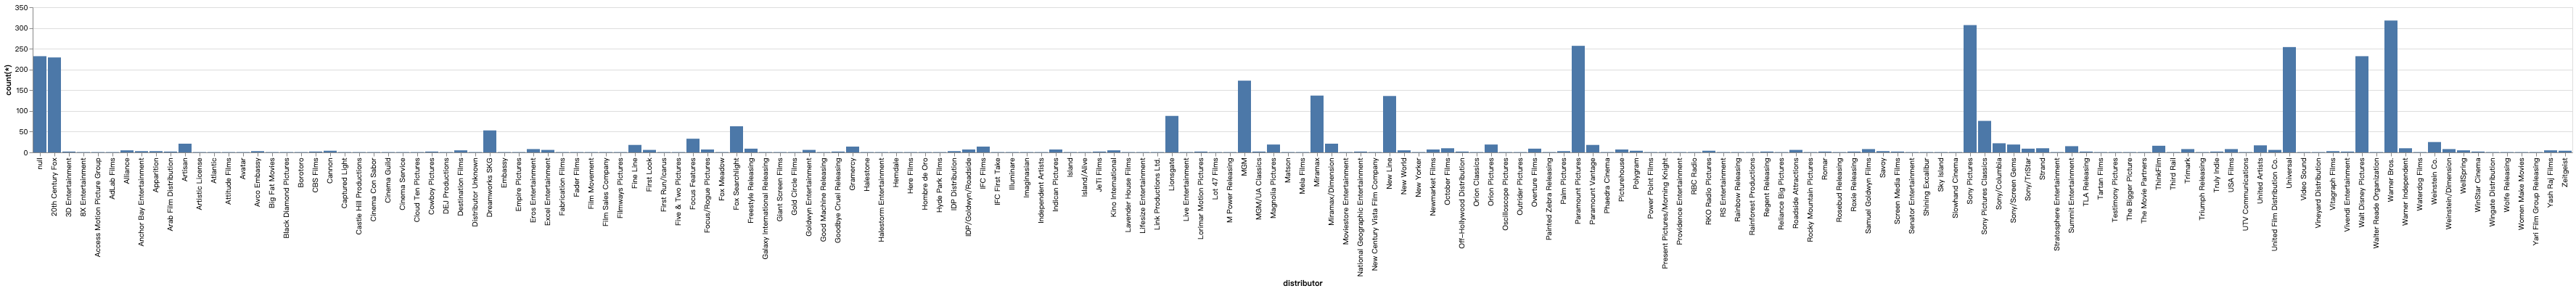

In [20]:
ncNet.nl2vis("show me distribution of distributor as a bar chart")